## Lab Session 

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

### Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [3]:
df = pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 1. Make a list of categorical and numerical columns in the data.

In [4]:
# numerical data columns
df.select_dtypes(include=np.number).columns

Index(['total_bill', 'tip', 'size'], dtype='object')

In [5]:
# categorical data columns
df.select_dtypes(include=object).columns

Index(['sex', 'smoker', 'day', 'time'], dtype='object')

### 2. Compute the average bill amount for each day.

In [6]:
df.groupby('day')['total_bill'].mean()

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

### 3. Which gender is more generous in giving tips?

In [7]:
df.groupby('sex')['tip'].mean()

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64

<ul>
    <li>Above data shows that the average tip given by male customers is more than female, hence males can be considered more generous in giving tip.</li>
</ul>

### 4. According to the data, were there more customers for dinner or lunch?

In [8]:
df.groupby('time')['size'].sum()

time
Dinner    463
Lunch     164
Name: size, dtype: int64

<ul>
    <li>We can see that the number of customers were more during dinner time.</li>
</ul>

### 5. Based on the statistical summary, comment on the variable 'tip'

In [9]:
df['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

<ul>
    <li>Maximum tip received is \$10.</li>
    <li>Minimum tip received is \$1.</li>
    <li>Average and median tip received is around \$3.</li>
    <li>Maximum tip received is \$10.</li>
    <li>Count shows all the rows which means there were no customers who gave zero or nil tip.</li>
</ul>

### 6. Find the busiest day in terms of the orders?

In [10]:
df.groupby('day')['total_bill'].sum().sort_values(ascending=False)

day
Sat     1778.40
Sun     1627.16
Thur    1096.33
Fri      325.88
Name: total_bill, dtype: float64

<ul>
    <li>In terms of orders, highest total order value was on Saturday, so it can be considered as the busiest day.</li>
</ul>

### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

In [11]:
df['total_bill'].skew()

1.1332130376158205

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

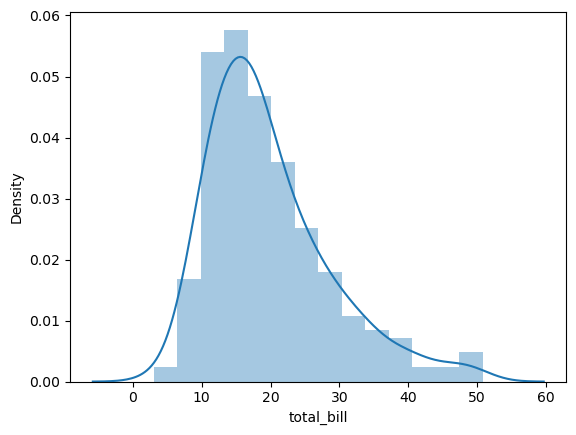

In [12]:
sns.distplot(df['total_bill'])

<ul>
    <li>From the plot of 'total_bill' that deviates more from normal distribution towards the right, and the skewness being a positive vaue, we can infer that variable 'total_bill' is positively skewed.</li>
</ul>

### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

In [13]:
df[['tip', 'total_bill']].corr()

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

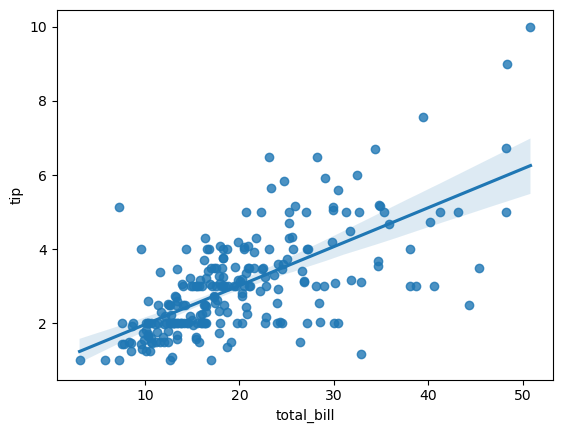

In [14]:
sns.regplot(data=df, x='total_bill', y='tip')

<ul>
    <li>From the values of correlation coefficient being between 0.5 and 0.7, the two variables 'tip' and 'total_bill' can be considered moderately correlated.</li>
    <li>From the regression plot, the slope of the regression line indicates a positive linear relationship between the two variables 'tip' and 'total_bill'.</li>
</ul>

### 9. What is the percentage of males and females in the dataset? and display it in the plot

In [14]:
# calculcating percentage of males and females in dataset

df_percent_sex = df['sex'].value_counts(normalize=True) *100
df_percent_sex

Male      64.344262
Female    35.655738
Name: sex, dtype: float64

<AxesSubplot:ylabel='sex'>

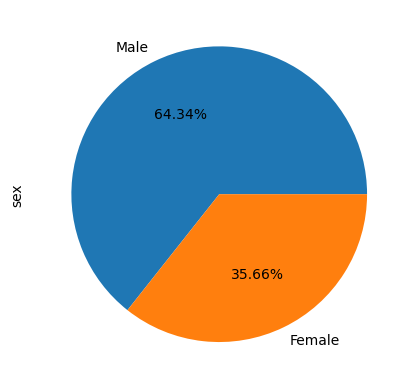

In [15]:
# pie chart showing the percentage in a plot

df_percent_sex.plot(kind='pie', autopct='%1.2f%%') 

### 10. Compute the gender-wise count based on smoking habits and display it in the plot

In [16]:
# getting gender wise count of smokers and non-smokers
smoker_count = pd.crosstab(df['sex'], df['smoker'])
smoker_count

smoker,No,Yes
sex,,
Female,54,33
Male,97,60


<AxesSubplot:xlabel='sex'>

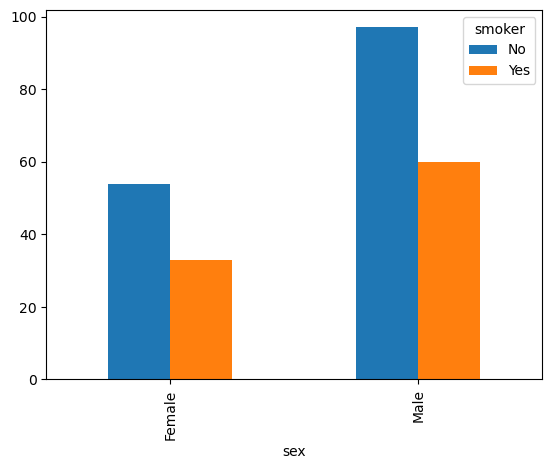

In [17]:
# displaying the count in a plot
smoker_count.plot(kind='bar')

### 11. Compute the average tip amount given for different days and display it in the plot.

In [18]:
df_tip_days = df.groupby('day')['tip'].mean()
df_tip_days

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64

<AxesSubplot:xlabel='day', ylabel='tip'>

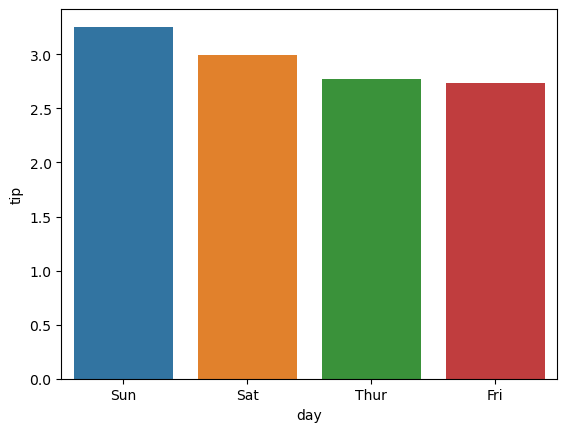

In [19]:
sns.barplot(data=df, x='day', y='tip', ci=False)

### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

<AxesSubplot:xlabel='size', ylabel='total_bill'>

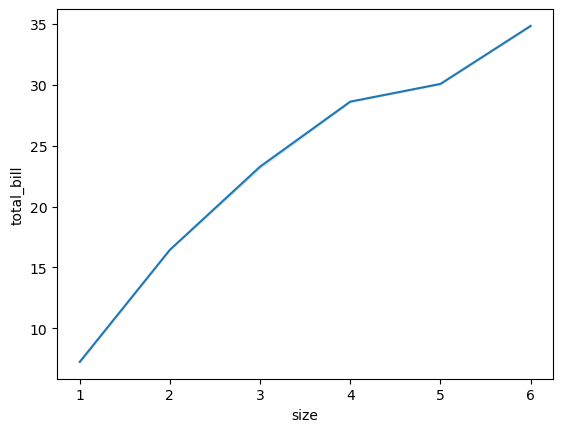

In [20]:
sns.lineplot(data=df, x='size', y='total_bill', estimator=np.mean, ci=False)

<ul>
    <li>From the plot of 'total_bill' vs 'size', we can conclude that the total bill amount is directly proportional to the size of the group.</li>
</ul>

### 13. Plot a horizontal boxplot to compare the bill amount based on gender

<AxesSubplot:xlabel='total_bill', ylabel='sex'>

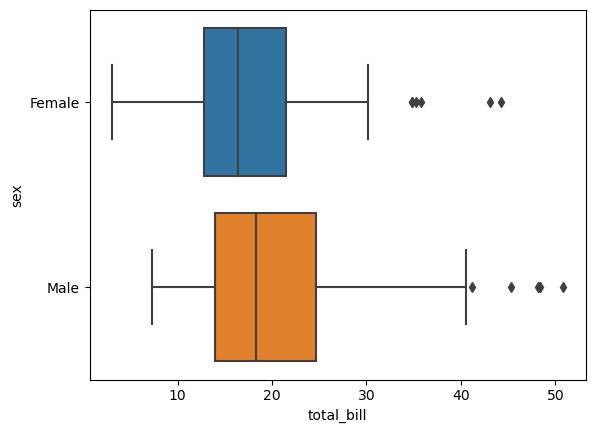

In [21]:
sns.boxplot(data=df, x='total_bill', y='sex', orient='h')

### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [22]:
# filtering dataframe with Saturday and Sunday only
df1 = df.loc[(df["day"]=='Sat') | (df["day"]=='Sun')]

# finding max value for lunch and dinner on new dataframe
df1.groupby(['day', 'time'])['total_bill'].max()

day  time  
Sat  Dinner    50.81
Sun  Dinner    48.17
Name: total_bill, dtype: float64

### 15. Compute the percentage of missing values in the dataset.

In [23]:
(df.isnull().sum() / len(df)) * 100

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64

<ul>
    <li>There are no missing values (0%) in the dataset.</li>
</ul>

### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [24]:
# checking for duplicates
df[df.duplicated()]

,total_bill,tip,sex,smoker,day,time,size
202,13.0,2.0,Female,Yes,Thur,Lunch,2


<ul>
    <li>Entry 202 is the only duplicate record in the dataset.</li>
</ul>

In [25]:
# dropping duplicates
df_new = df.drop_duplicates()
df_new

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

<AxesSubplot:xlabel='total_bill'>

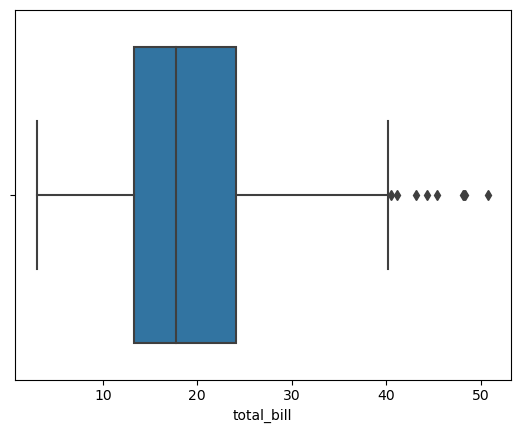

In [26]:
# before log transformation treatment
sns.boxplot(df['total_bill'])

<AxesSubplot:xlabel='total_bill'>

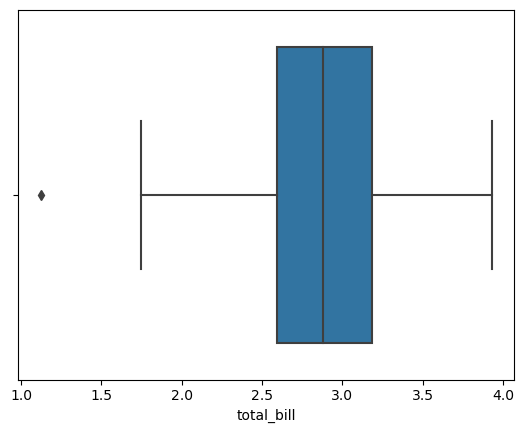

In [27]:
# after log transformation treatment
df_trans = np.log(df['total_bill'])
sns.boxplot(df_trans)

### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

In [28]:
# calculating the IQR
Q1 = df['tip'].quantile(0.25)
Q3 = df['tip'].quantile(0.75)
IQR = Q3 - Q1

In [29]:
# finding upper and lower limits
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

In [30]:
# removing outliers above upper and below lower limits
df_wo_out = df['tip'][(df['tip'] > upper) | (df['tip'] < lower)]

<AxesSubplot:xlabel='tip'>

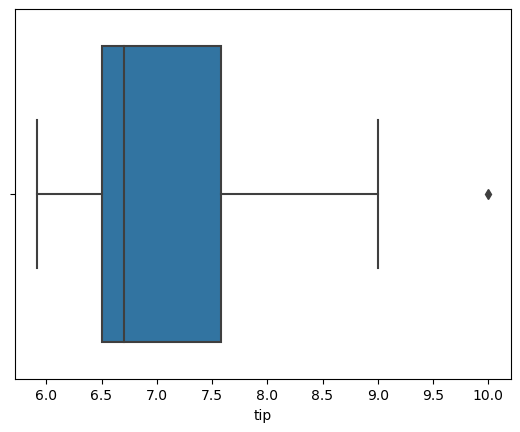

In [31]:
# plotting to check the processed data
sns.boxplot(df_wo_out)

### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [15]:
# selecting categorical columns 
df_cat = df.select_dtypes(include=['object'])
df_cat.head()

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner


In [16]:
# one-hot encoding and displaying 5 random samples
pd.get_dummies(df_cat).sample(n=5, axis='rows')

,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
114,1,0,1,0,0,0,1,0,1,0
169,1,0,0,1,0,1,0,0,1,0
123,0,1,1,0,0,0,0,1,0,1
35,0,1,1,0,0,1,0,0,1,0
80,0,1,0,1,0,0,0,1,0,1


### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [17]:
# checking range of the column 'total_bill'
df_min = df['total_bill'].min()
df_max = df['total_bill'].max()
print('Range of column "total_bill" is', df_min, 'to', df_max)

Range of column "total_bill" is 3.07 to 50.81


In [18]:
# transforming values of 'total_bill' to a range of 0 to 1
mm = MinMaxScaler()
df_scaled = mm.fit_transform(df[['total_bill']])
df_scaled = pd.DataFrame(df_scaled, columns=['total_bill'])
df_scaled_min = df_scaled['total_bill'].min()
df_scaled_max = df_scaled['total_bill'].max()
print('Transformed range of column "total_bill" is', df_scaled_min, 'to', df_scaled_max)

Transformed range of column "total_bill" is 0.0 to 0.9999999999999999


### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [29]:
# loading dataset as "tips_df"
tips_df = df.copy()
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [30]:
# encoding categorical variables
tips_df_cat_cols = tips_df.select_dtypes(include=['object'])
tips_df_cat = pd.get_dummies(tips_df_cat_cols, drop_first=True)
tips_df_cat.head()

,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,0,0,0,1,0,0
1,1,0,0,1,0,0
2,1,0,0,1,0,0
3,1,0,0,1,0,0
4,0,0,0,1,0,0


In [31]:
# extracting numerical columns
tips_df_num = tips_df.drop(columns=tips_df_cat_cols.columns) 
tips_df_num.head()

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


In [32]:
# concatenating the two dataframes - categorical and numerical
tips_df = pd.concat([tips_df_num, tips_df_cat], axis=1)

In [33]:
# Storing the target column 'tip' in y variable
y = tips_df[['tip']]
y.head()

,tip
0,1.01
1,1.66
2,3.50
3,3.31
4,3.61


In [34]:
# Storing rest of the columns in X variable
# X = tips_df_num
X = tips_df.drop('tip', axis=1)
X.head()

,total_bill,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,2,0,0,0,1,0,0
1,10.34,3,1,0,0,1,0,0
2,21.01,3,1,0,0,1,0,0
3,23.68,2,1,0,0,1,0,0
4,24.59,4,0,0,0,1,0,0


### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "size" using the min_max scaling approach

In [35]:
# splitting dataset into train-test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(170, 8) (74, 8) (170, 1) (74, 1)


In [36]:
# Standardization of columns "total_bill" and "size" using min-max scaling approach
tips_df['total_bill'] = (tips_df['total_bill'] - tips_df['total_bill'].min()) / (tips_df['total_bill'].max() - tips_df['total_bill'].min())
tips_df['size'] = (tips_df['size'] - tips_df['size'].min()) / (tips_df['size'].max() - tips_df['size'].min())
tips_df[['total_bill', 'size']].sample(n=5, axis='rows')

,total_bill,size
219,0.567030,0.6
75,0.155844,0.2
158,0.216171,0.2
188,0.315878,0.4
38,0.327189,0.4


### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [37]:
# creating an instance of the Linear Regression Python object
model = LinearRegression()

# training this model
model.fit(X_train, y_train)

# predictions on the test data
predictions = model.predict(X_test)

print(r2_score(y_test, predictions))

0.47112072283461237


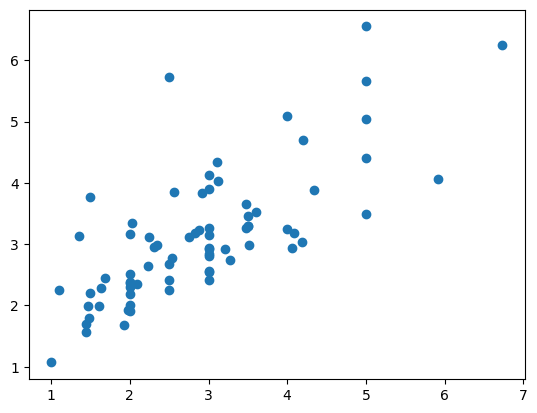

In [38]:
plt.scatter(y_test, predictions)

<ul>
    <li>From the above findings, we can see that when encoded categorical columns are included, the model can predict the tip amount with low to moderate accuracy.</li>
    <li>If we include only numerical columns, the model can predict the tip amount with high accuracy.</li>
</ul>

### Happy Learning:)